## 統計解析
### 統計解析の種類
- 記述統計
    - 集めたデータの特徴を掴んだりわかりやすく整理したり見やすくする
    - ex. 平均・標準偏差などを計算しデータの特徴を計算・分類・図示する
- 推論統計
    - 集めたデータから推論
    - ランダムに抽出した一部を対象にしらべ、母集団の特徴を推論する
    - 全人口の年齢別身長を調べるためにランダムに抽出
    - 部分的なデータしかないものから確率分布に基づいたモデルを用いて精密な解析を行う
    - 過去のデータから未来予測する

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

# 線形解析分析用ライブラリ
from sklearn import linear_model

In [4]:
# データの読み込み
# CSV形式・データベースとしてデータを扱うのが一般的
# 研究用データであればzip形式で提供されていることも

In [7]:
pwd

'/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic'

In [9]:
mkdir chap3

mkdir: chap3: File exists


In [10]:
cd ./chap3

/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic/chap3


In [11]:
pwd

'/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic/chap3'

In [12]:
import requests, zipfile
from io import StringIO
import io

download_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"
r = requests.get(download_url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [14]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [19]:
student_data_math = pd.read_csv('student-mat.csv')
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [21]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
?pd.read_csv

In [25]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### 変数について
- Pythonの変数
    - データを格納するための機能
- データ解析における変数
    - 対象データにおいて変化する値を示す
    - ex. 目的変数・説明変数
   

In [27]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

### データの分類
- 量的データ
    - 四則演算適用可能な連続値で表現される
    - ex. 人数・金額
- 質的データ
    - 四則演算適用不可能な不連続のデータ
    - 状態を表現するために利用
    - ex. 順位・カテゴリ
    

In [29]:
# 質的データの例 性別
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [31]:
# 量的データの例 欠席数
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [34]:
# 性別を軸とした年齢の平均値
student_data_math.groupby('sex')['age'].mean()
student_data_math.groupby('sex')['G1'].mean()

sex
F    10.620192
M    11.229947
Name: G1, dtype: float64

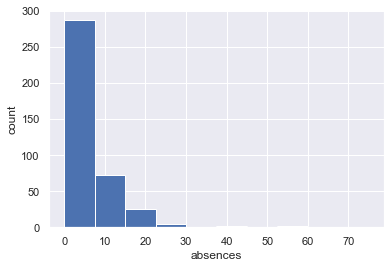

In [36]:
# ヒストグラム
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [37]:
# 要約統計量の計算
# ex. 中央値・平均・標準偏差
print('平均値：', student_data_math['absences'].mean())
print('中央値：', student_data_math['absences'].median())
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64
